In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the cylinder dataset from VORTALL.csv

data = np.loadtxt("Data/cylinder/VORTALL.csv", delimiter=',').T
nx = int(np.loadtxt("Data/cylinder/n.csv").item())
ny = int(np.loadtxt("Data/cylinder/m.csv").item())



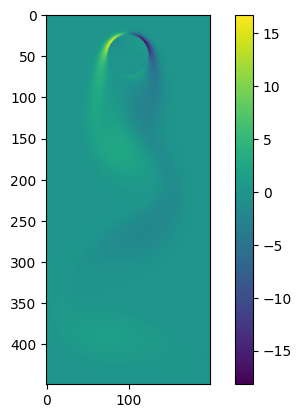

In [3]:
plt.imshow(data[0,:].reshape((nx,ny)),cmap='viridis')
plt.colorbar();

In [4]:
n = data.shape[0]
val_length = 5
lags = 10

train_indices = np.arange(0, int(n*0.85))
valid_indices = np.arange(int(n*0.85), int(n*0.85) + val_length)
test_indices = np.arange(int(n*0.85) + val_length, n - lags)

## Load and visualize reconstructions

In [29]:
def plot_reconstruction(reconstruction,truths,plot_index, sensor_locations, num_sensors=10, title="SHRED reconstruction"):

    # Convert the sensor location indices from the 1D array to indices in the reshaped 2D array
    sensor_locations_2d = np.array([np.unravel_index(loc, (nx, ny)) for loc in sensor_locations])
    plot_recon = reconstruction[plot_index]
    plot_true = truths[plot_index]
    plot_err =  truths[plot_index]-reconstruction[plot_index]
    # min and max values for the colorbar
    vmin = -max(abs(np.min(plot_err)),abs(np.max(plot_err)))
    vmax = max(abs(np.min(plot_err)),abs(np.max(plot_err)))

    fig,axs = plt.subplots(1,3,figsize=(12,6))
    fig.suptitle(title)

    pl = axs[0].imshow(plot_recon.reshape((nx,ny)),cmap='YlGnBu')
    plt.colorbar(pl)
    axs[0].set_title('Reconstruction')


    pl = axs[1].imshow(plot_true.reshape((nx,ny)),cmap='YlGnBu')
    plt.colorbar(pl)
    axs[1].set_title('Ground truth')

    pl = axs[2].imshow(plot_err.reshape((nx,ny)),cmap="bwr",vmin=vmin,vmax=vmax)
    plt.colorbar(pl)
    axs[2].set_title('Ground truth')

    # Add a red dot to the spatial points indicated by the sensor locations
    for i in range(num_sensors):
        axs[0].scatter(sensor_locations_2d[i,1], sensor_locations_2d[i,0], color='red', s=40, label='Sensor location')
        axs[1].scatter(sensor_locations_2d[i,1], sensor_locations_2d[i,0], color='red', s=40, label='Sensor location')

    plt.tight_layout()

def compute_RMSES(reconstruction,truths):
    # RMSE for training, validation and test sets
    # Train set
    # rmse = np.sqrt(np.mean(np.square((reconstruction[train_idx]-truths[train_idx]))))
    # print('Train RMSE:      ', rmse)

    # # Validation set
    # rmse = np.sqrt(np.mean(np.square((reconstruction[val_idx]-truths[val_idx]))))
    # print('Validation RMSE: ', rmse)

    # Validation set
    rmse = np.sqrt(np.mean(np.square((reconstruction-truths))))
    print('Test RMSE:       ', rmse)



Test RMSE:        0.010567464


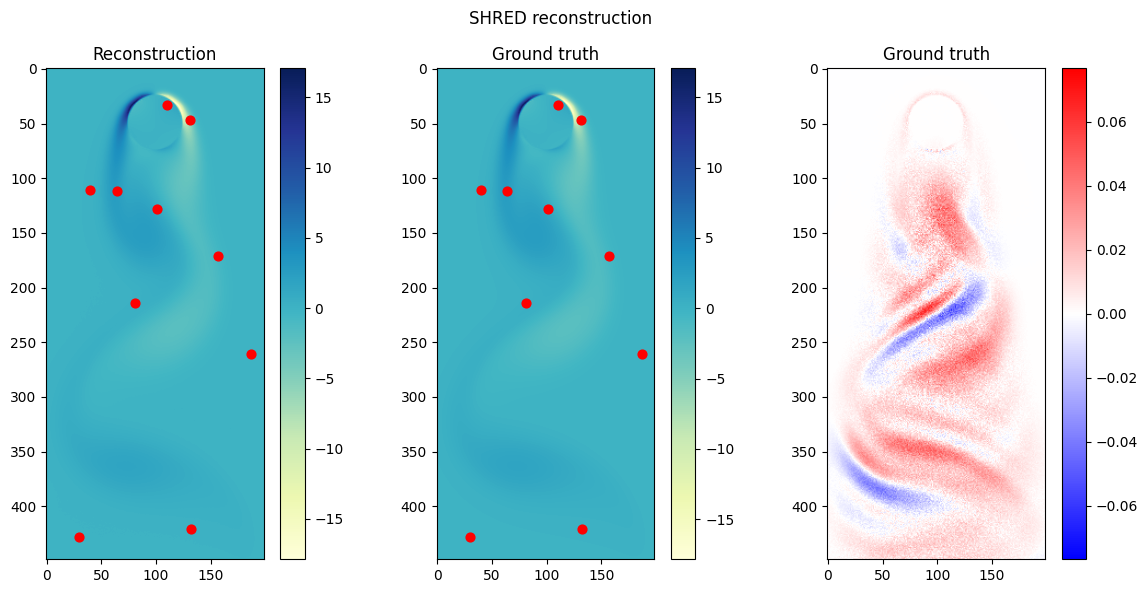

Test RMSE:        0.8801181061516349


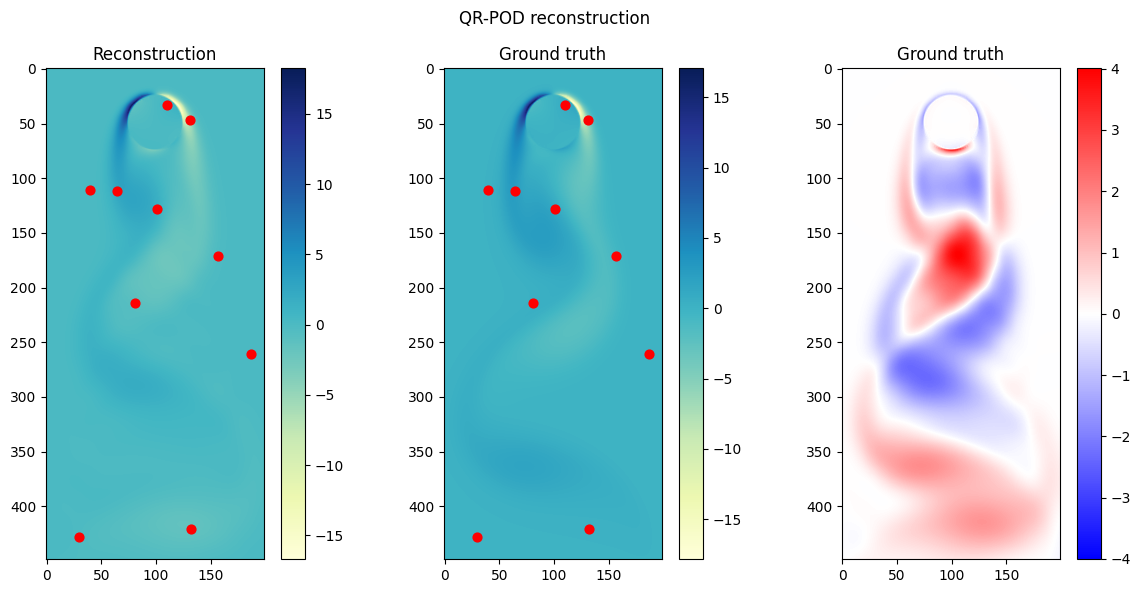

In [30]:
plot_index = 6 
num_sensors = 10
lag=10

reconstruction = np.load(f'ReconstructingResults/cylinder/reconstructions_sensor{num_sensors}lag{lag}.npy')
truths = np.load('ReconstructingResults/cylinder/truth.npy')
sensor_locations = np.load(f'ReconstructingResults/cylinder/sensor_locations_sensor{num_sensors}lag{lag}.npy')

compute_RMSES(reconstruction,truths)

plot_reconstruction(reconstruction, truths, plot_index, sensor_locations,num_sensors=num_sensors)
plt.show()

reconstruction = np.load(f'ReconstructingResults/cylinder/qrpodreconstructions_sensor{num_sensors}lag{lag}.npy')
truths = np.load('ReconstructingResults/cylinder/truth.npy')
sensor_locations = np.load(f'ReconstructingResults/cylinder/sensor_locations_sensor{num_sensors}lag{lag}.npy')

compute_RMSES(reconstruction,truths)

plot_reconstruction(reconstruction, truths, plot_index, sensor_locations,num_sensors=num_sensors, title="QR-POD reconstruction")
plt.show()



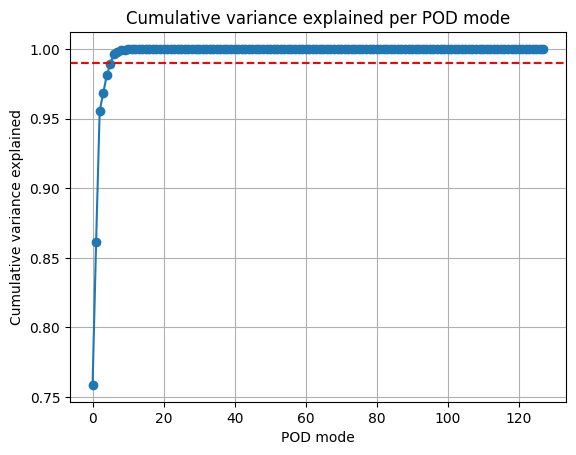

In [31]:
Sigma = np.load(f'ReconstructingResults/cylinder/singularvals_sensor{num_sensors}lag{lag}.npy')

# plt.semilogy(Sigma,'o-');
# plt.grid()
# plt.title('Singular values of the POD modes')

# Compute the cummulative variance explained per POD mode and plot
plt.figure()
cumulative_variance = np.cumsum(Sigma**2) / np.sum(Sigma**2)
plt.plot(cumulative_variance, 'o-')
plt.grid()
plt.title('Cumulative variance explained per POD mode')
plt.xlabel('POD mode')
plt.ylabel('Cumulative variance explained')
plt.axhline(y=0.99, color='r', linestyle='--')
